In [89]:
info = {
 "title": "Fireplace",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1920, 1080)
}

In [1]:
from math import pi
import numpy as np

from stylo.domain.transform import translate
from stylo.color import FillColor
from stylo.shape import Rectangle, Shape, Circle
from stylo.image import LayeredImage

In [48]:
black = FillColor()
red = FillColor("ee0000")
darkred = FillColor("660000")
silvery = FillColor("dddddd")
light_brown = FillColor("884400")
dark_brown = FillColor("663300")

In [86]:
class Brick(Shape):
    
    def __init__(self, invert=False):
        self.invert = invert
    
    def draw(self):
        
        def brick(x, y):
            layers = np.abs(y % 0.2) > 0.02
            odd_layers = np.abs((y) % 0.4) > 0.2
            
            if self.invert:
                odd_layers = np.logical_not(odd_layers)
            
            splits = np.abs(x % 0.45) > 0.02
            split1 = np.logical_and(splits, odd_layers)
            
            return np.logical_and(layers, split1)
    
        return brick
    
class Arch(Shape):
    
    def __init__(self, scale=1, pt=0.03):
        self.scale = scale
        self.pt = pt
    
    def draw(self):
        
        arc = Circle(r=1, pt=self.pt)
        pt2 = self.pt / 2
        
        def arch(x, y):
            x = x / self.scale
            y = y / self.scale
            
            top = np.logical_and(arc(x=x, y=y), y > 0)
            
            sides = np.logical_or(np.abs(x - 1) < pt2, np.abs(x + 1) < pt2)
            sides = np.logical_and(sides, y < 0)
            
            return np.logical_or(top, sides)
            
        return arch
    
class Base(Shape):
    
    def draw(self):
        
        rectangle = Rectangle(x=0, y=0, width=1, height=0.3)
        
        def base(x, y):
            shape = rectangle(x=x, y=y)
            
            cutouts = np.logical_or(np.abs(y - 0.1) < 0.02, np.abs(y + 0.1) < 0.02)
            cutouts = np.logical_not(cutouts)
            
            return np.logical_and(shape, cutouts)
            
        return base
    
class Surround(Shape):
    
    def __init__(self, invert=False):
        self.invert = invert
    
    def draw(self):
        
        shape = Rectangle(x=1.5, y=-0.5, width=0.5, height=2.75)
        groove = Rectangle(x=1.5, y=-0.5, width=0.35, height=1.75)
        circle1 = Circle(x=1.5, y=0.65, r=0.18, pt=0.01)
        circle2 = Circle(x=1.5, y=0.65, r=0.1, pt=0.005)
        
        def surround(x, y):
            
            x = np.abs(x)
            
            mask = shape(x=x, y=y)
            cutout = np.logical_or(groove(x=x, y=y), circle1(x=x, y=y))
            cutout = np.logical_or(cutout, circle2(x=x, y=y))
            
            side = np.logical_and(mask, np.logical_not(cutout))
            
            if self.invert:
                return np.logical_and(mask, np.logical_not(side))
            
            return side
            
        return surround
    
class Lintel(Shape):
    
    def __init__(self, invert=False):
        self.invert = invert
    
    def draw(self):
        
        shape = Rectangle(x=0, y=0.65, width=2.75, height=0.4)
        groove = Rectangle(x=0, y=0.65, width=2.25, height=0.3)
        
        def lintel(x, y):
            mask = shape(x=x, y=y)
            cutout = np.logical_not(groove(x=x, y=y))
                        
            if self.invert:
                return np.logical_and(mask, np.logical_not(cutout))
            
            return np.logical_and(mask, cutout)
            
        return lintel

In [87]:
arch_y = -0.65 

brick = Brick()
brick2 = Brick(invert=True) >> translate(0.2, 0)

grate = Rectangle(x=0, y=-0.65, width=2.75, height=2.25)
mantel = Rectangle(x=0, y=0.9, width=3.95, height=0.1)

arch = Arch() >> translate(0, arch_y)
arch2 = Arch(scale=0.8) >> translate(0, arch_y)
arch3 = Arch(scale=0.9, pt=0.05) >> translate(0, arch_y)
arch4 = Arch(scale=0.5) >> translate(0, arch_y - 0.2)

base = Base() >> translate(0, arch_y - 1)

surround = Surround()
surround2 = Surround(invert=True)

lintel = Lintel()
lintel2 = Lintel(invert=True)

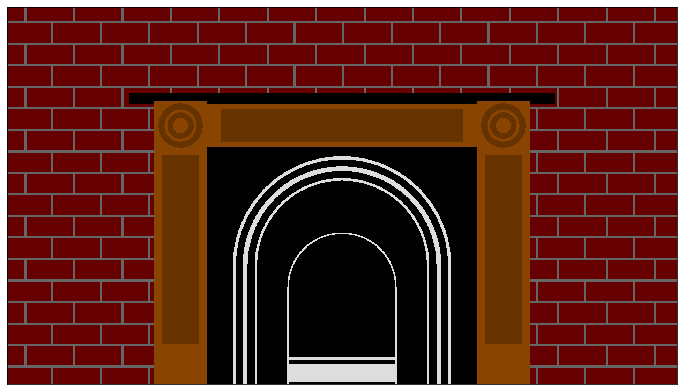

In [88]:
image = LayeredImage(background="666666", scale=3.5)

image.add_layer(brick, darkred)
image.add_layer(brick2, darkred)

image.add_layer(grate, black)

image.add_layer(arch, silvery)
image.add_layer(arch2, silvery)
image.add_layer(arch3, silvery)
image.add_layer(arch4, silvery)
image.add_layer(base, silvery)

image.add_layer(lintel, light_brown)
image.add_layer(lintel2, dark_brown)

image.add_layer(mantel, black)

image.add_layer(surround, light_brown)
image.add_layer(surround2, dark_brown)